Problem 2

In [261]:
from matplotlib import pyplot as plt
import numpy as np
import sys

In [295]:
#This function allows me to interpret the input as mathematical function
def parse(f):
    '''This method takes the function f(z)=0 as a string input'''
    ''' and converts it into a mathematical function.'''
    if isinstance(f, str) == False:
        sys.exit('Please input f(z) as a string as you would using numpy')
    flist = f.split('z');
    fchange = ''
    ffinal = []
    for i, e in enumerate(flist):
        if i == len(flist) - 1:
            fchange += e
        else:
            fchange += e
            fchange += '%s'
    ffinal.append(fchange)
    ffinal.append(len(flist) - 1)
    return ffinal
    
def bisection(f, *zarg):
    '''The method takes a function f(x)=0, and 2 initial x's'''
    ''' as parameters, and implements the bisection method'''
    '''on it to find a root.'''
    if len(zarg) != 2:
        sys.exit("Please enter two valid values "
        "for z1 and z2 as initial guesses")
    z1, z2 = zarg;
    tol = .00001;
    zrange = np.abs(z2 - z1)
    zr_list = [zrange]
    func, t_len = parse(f)
    while  zrange > tol:
        z0 = (z1 + z2) / 2;
        zt0 = (z0,) * t_len;
        zt1 = (z1,) * t_len;
        f0 = eval(func % zt0)
        f1 = eval(func % zt1)
        if np.sign(f0) == np.sign(f1):
            z1 = z0
            zrange = np.abs(z2 - z1)
            zr_list.append(zrange)
        else:
            z2 = z0
            zrange = np.abs(z2 - z1)
            zr_list.append(zrange) #Radius of convergence
    return(zr_list, z2) #Radius and the final value of the root
    
def NRmethod(f1, f2, *zarg):
    '''The method takes a function f1(z)=0, its derivative f2(z)=f1'(z)'''
    '''and an initial z1 as a parameter and implements'''
    '''the Newton-Raphson method on it to find a root.'''
    if len(zarg) == 0:
        sys.exit("Please enter a valid value "
        "for z1 as an initial guess")
    z1 = zarg[0];
    tol = .00001;
    func1, t_len1 = parse(f1)
    func2, t_len2 = parse(f2)
    func1val = 2 * tol; #ensures initial run
    zr_list = []
    while np.abs(func1val) > tol:
        zt1 = (z1,) * t_len1;
        zt2 = (z1,) * t_len2;
        if t_len2 == 0:
            f1 = eval(func1 % zt1);
            f2 = eval(func2);
        else:
            f1 = eval(func1 % zt1);
            f2 = eval(func2 % zt2);
        z1 = z1 - (f1 / f2);
        ztf = (z1,) * t_len1;
        func1val = eval(func1 % ztf)
        zr_list.append(np.abs(f1/f2)) #Radius of convergence
    return(zr_list, z1) #Radius and the final value of the root

def secant(f, *zarg):
    '''The method takes a function f(z)=0, and initial guesses'''
    '''for z1 and z2 as parameters and implements'''
    '''the secant method on it to find a root.'''
    if len(zarg) != 2:
        sys.exit("Please enter two valid values "
        "for z1 and z2 as initial guesses")
    z1, z2 = zarg;
    tol = .00001;
    func, t_len = parse(f);
    fval = 2 * tol; #ensures initial run
    zr_list = []
    while np.abs(fval) > tol:
        zt1 = (z1,) * t_len;
        zt2 = (z2,) * t_len;
        f1 = eval(func % zt1);
        f2 = eval(func % zt2);
        der = (f2 - f1) / (z2 - z1);
        z3 = z2 - (f2 / der);
        z1 = z2;
        z2 = z3;
        ztf = (z2,) * t_len;
        fval = eval(func % ztf);
        zr_list.append(np.abs(z2 - z1)) #Radius of convergence
    return(zr_list, z2) #Radius and the final value of the root

In [296]:
b_list = bisection('np.sin(z)-.5',-1,2)[0]
NR_list = NRmethod('np.sin(z)-.5','np.cos(z)',2)[0]
s_list = secant('np.sin(z)-.5', 0, 1.5)[0]

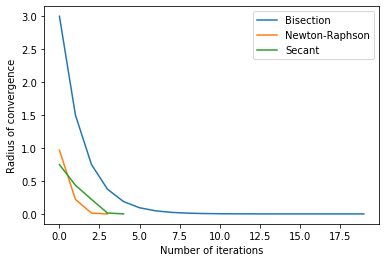

In [396]:
plt.plot(b_list, label = 'Bisection')
plt.plot(NR_list, label = 'Newton-Raphson')
plt.plot(s_list, label = 'Secant')
plt.legend()
plt.xlabel("Number of iterations");
plt.ylabel("Radius of convergence");

plt.savefig('converge.png')

Problem 3

In [374]:
#Define variables
e = 0.617139;
T = 27906.98161;
a = 2.34186 * 3 * 10**8;

time_l = np.linspace(0, 15000, num=15001);

#Find a list of values for ξ
zlist = []
for t in time_l:
    root = NRmethod('T/(2*np.pi) * (z - e * np.sin(z)) - t',\
                    'T/(2*np.pi) * (1 - e * np.cos(z))', -5, 5)[1]
    zlist.append(root)
    
#Making a list of x and y values for the orbit
x_list = a * np.cos(zlist) - e;
y_list = a * np.sqrt(1 - e**2) * np.sin(zlist);
ny_list = (-1) * a * np.sqrt(1 - e**2) * np.sin(zlist);

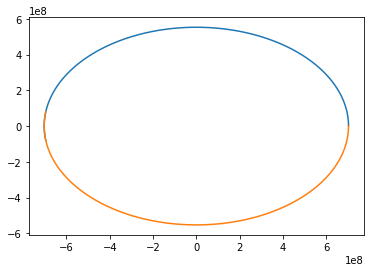

In [395]:
#Plotting the lists, I also plotted a negative version of y(ξ)
#in order to get the entire orbit
plt.plot(x_list, y_list)
plt.plot(x_list, ny_list)
plt.savefig('orbit.png')

Problem 4

In [392]:
#Find the derivatives of x and y
dt = .0000001;
xp_list = [];
yp_list = [];

#Find a list of values for ξ
zlist_pdt = []
zlist_ndt = []
for t in time_l:
    proot = NRmethod('T/(2*np.pi) * (z - e * np.sin(z)) - (t + dt)',\
                    'T/(2*np.pi) * (1 - e * np.cos(z))', -5, 5)[1]
    nroot = NRmethod('T/(2*np.pi) * (z - e * np.sin(z)) - (t - dt)',\
                    'T/(2*np.pi) * (1 - e * np.cos(z))', -5, 5)[1]
    zlist_pdt.append(proot)
    zlist_ndt.append(nroot)
    
#Find a list of values for x'(t) and y'(t)
xp = ((a * np.cos(zlist_pdt) - e) - (a * np.cos(zlist) - e)) / dt;
yp = ((a * np.sqrt(1 - e**2) * np.sin(zlist_ndt)) - (a * np.sqrt(1 - e**2) * np.sin(zlist))) / dt;

In [393]:
#Guessing a value for phi
phi = np.pi/2
xp_c = xp * np.cos(phi);
yp_c = yp * np.sin(phi);
rv = np.sqrt(xp**2 +yp**2) / 1000;

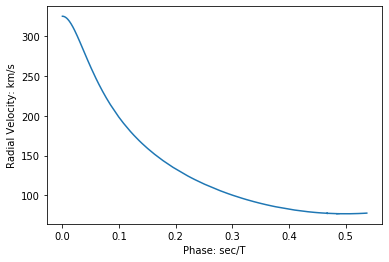

In [399]:
#Plotting the lists, I also plotted a negative version of y(ξ)
#in order to get the entire orbit
plt.plot(time_l/T, rv)
plt.xlabel('Phase: sec/T')
plt.ylabel('Radial Velocity: km/s')
plt.savefig('phase.png')